In [3]:
# I need to redo the basics in pytorch, I have forgotten it all.
# Lets train a simple neural net to learn mnist
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# So first lets fetch the data
data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.3,))])
# download the data and apply above transform
train_set = torchvision.datasets.MNIST('./data/', train=True, transform=data_transform, download=True)
test_set = torchvision.datasets.MNIST('./data/', train=False, transform=data_transform, download=True)

train_data = torch.utils.data.DataLoader(train_set, batch_size=500, shuffle=True)
test_data = torch.utils.data.DataLoader(test_set, batch_size=10000, shuffle=True)

In [132]:
# lets define a very simple multi layer perceptron
class mlp(torch.nn.Module):
    def __init__(self, x_dim, y_dim, out_dim):
        super().__init__()
        self.n_input_pixels = x_dim * y_dim
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(x_dim * y_dim, 500),
            torch.nn.ReLU(),
            torch.nn.Linear(500, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 10)
        )
    
    def forward_pass(self, x):
        # forward pass through the layers, applying a nonlinearity each time
        x = x.view(-1, self.n_input_pixels)
        return self.layers(x)

In [133]:
# so that was alright, lets try lenet5
class lenet(torch.nn.Module):
    def __init__(self):
        """
        [conv -> pool] * 2 -> [dense] * 3
        """
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = torch.nn.AvgPool2d(2, 2)
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        self.pool2 = torch.nn.AvgPool2d(2, 2)
        self.linear1 = torch.nn.Linear(400, 120)
        self.linear2 = torch.nn.Linear(120, 84)
        self.linear3 = torch.nn.Linear(84, 10)
        
    def forward_pass(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.nn.functional.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = torch.nn.functional.relu(self.linear1(x))
        x = torch.nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x
        

In [150]:
# main
#model = mlp(28, 28, 10)
model = lenet()
model_optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_function = torch.nn.CrossEntropyLoss()

num_epochs = 10
loss = []
for epoch in range(num_epochs):
    print("Epoch: ", epoch)
    for indices, (data, label) in enumerate(train_data):
        model_optimizer.zero_grad()
        data_var, label_var = torch.autograd.Variable(data), torch.autograd.Variable(label)
        model_prediction = model.forward_pass(data_var)
        prediction_loss = loss_function(model_prediction, label_var)
        loss.append(prediction_loss.item())
        prediction_loss.backward()
        model_optimizer.step()
    print(sum(loss)/len(loss))

Epoch:  0
2.0966102734208105
Epoch:  1
1.26445792807887
Epoch:  2
0.9168419325517283
Epoch:  3
0.7282810092593233
Epoch:  4
0.6076281255607804
Epoch:  5
0.5235207958457371
Epoch:  6
0.4615243908550058
Epoch:  7
0.4138150837505236
Epoch:  8
0.37562657974108504
Epoch:  9
0.3444224776125823


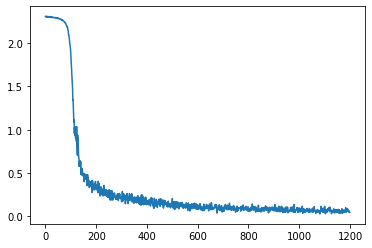

In [151]:
plt.plot([i for i in range(len(loss))], loss)

In [152]:
# lets test out how well the model performs
correct = 0
total = 0
for indices, (data, label) in enumerate(test_data):
    data_var, label_var = torch.autograd.Variable(data), torch.autograd.Variable(label)
    model_prediction = model.forward_pass(data_var)
    _, prediction_label = torch.max(model_prediction.data, dim=1)
    correct += (prediction_label == label_var.data).sum()
    total += len(label_var.data)
print(correct, total)

tensor(9800) 10000


tensor(4)
tensor([4])


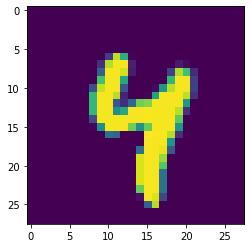

In [148]:
for x, y in test_data:
    print(y[0])
    pred = model.forward_pass(torch.autograd.Variable(x[0]))
    _, pred_label = torch.max(pred.data, dim=1)
    print(pred_label)
    plt.imshow(x[0].reshape(28, 28))

In [142]:
# Ok so that was alright, let trys the lenet 5